#### This notebook summarizes and calculates Mapping Accuracy of different methods, including our method, PASTE and PASTE2.

In [1]:
import os
import anndata
import scipy
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

sys.path.append('E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/code/result_analysis')
from mapping_score import calculate_mapping_score

In [2]:
def read_and_calculate_mapping(dir):
    """requires the directory to include .h5ad files and .npz files only """
    li_int = [int(fname.split('.')[0]) for fname in os.listdir(dir) if fname.endswith('.h5ad')]
    li_int.sort()

    LTARI_li = []
    for id in li_int[:-1]:
        adata_path_A = os.path.join(dir, '{}.h5ad'.format(id))
        adata_path_B = os.path.join(dir, '{}.h5ad'.format(id+1))
        sliceA = anndata.read(adata_path_A)
        sliceB = anndata.read(adata_path_B)

        pi_path = os.path.join(dir, '{}.npz'.format(id))
        if os.path.isfile(pi_path):
            pi = scipy.sparse.load_npz(pi_path).todense()
        
            if pi.shape[0] == sliceA.X.shape[0] and pi.shape[1] == sliceB.X.shape[0]:
                filter_by_label = False
            else:
                filter_by_label = True
            score = calculate_mapping_score(pi, sliceA, sliceB, filter_by_label, 'annotation')
        else:
            score = 0  # method failed, pi is None, hence score is 0
        LTARI_li.append(score)
    return LTARI_li

In [3]:
def gen_df(all_data_output, mark_data, mtd_li):
    """
    generate dataframe of mapping scores of different slice pairs (rows) and different methods (columns)
    """
    mtd_scores = {}
    for mtd in mtd_li:
        print(mtd)
        fo = [fo for fo in os.listdir(all_data_output) if mark_data in fo and mtd in fo][0]
        dir = os.path.join(all_data_output, fo)
        score_li = read_and_calculate_mapping(dir)
        print(score_li)
        mtd_scores[mtd] = score_li

    df = pd.DataFrame.from_dict(mtd_scores)
    return df

###### Mapping Accuracy analysis of different methods on DLPFC, Sample Ⅲ

In [4]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'  # change this to your directory that saves output data
mark_data = 'DLPFC'
mtd_li = ['PASTE', 'PASTE2', 'ours', 'ours_ablation']
df_DLPFC = gen_df(all_data_output, mark_data, mtd_li)

PASTE
[0.3560887811467018, 0.2940538834985119, 0.3258878298277704]
PASTE2
[0.7611168482466792, 0.7745297535120478, 0.7486896232407508]
ours
[0.911448676483738, 0.8884868134467675, 0.8853263004940712]
ours_ablation
[0.36686003631230435, 0.3329863094732908, 0.3009531381943679]


In [5]:
df_DLPFC

,PASTE,PASTE2,ours,ours_ablation
0,0.356089,0.761117,0.911449,0.366860
1,0.294054,0.774530,0.888487,0.332986
2,0.325888,0.748690,0.885326,0.300953


([<matplotlib.axis.YTick at 0x27aa8431e50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

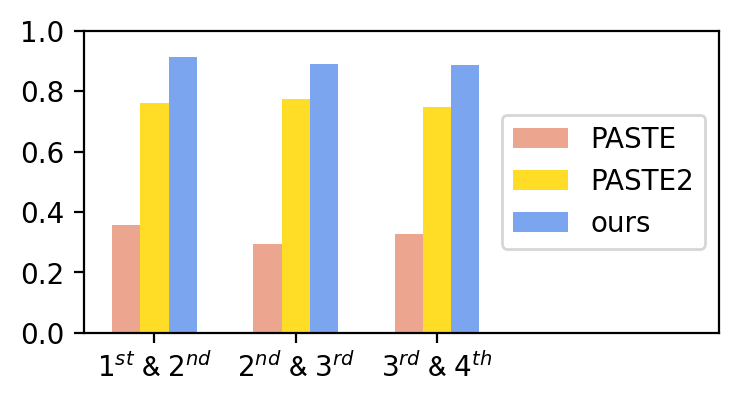

In [32]:
mtd_color = {'ours': 'cornflowerblue', 'ours_ablation': 'tan', 'PASTE': 'darksalmon', 'PASTE2': 'gold'}
width_ = 0.2

def int2order(ind):
    if ind == 1:
        return '$1^{%02s}$' % ('st')
    elif ind == 2:
        return '$2^{%02s}$' % ('nd')
    elif ind == 3:
        return '$3^{%02s}$' % ('rd')
    else:
        return '$%01d^{%02s}$' % (ind, 'th')

plt.figure(figsize=(4.1,2), dpi=200)
for i, col in enumerate(['PASTE', 'PASTE2', 'ours']):
    plt.bar(df_DLPFC[col].index + i * width_, df_DLPFC[col], color=mtd_color[col], width=width_, alpha=0.85, label=col)
plt.legend(loc='center right')

inds = df_DLPFC['ours'].index
plt.xlim(-0.3,4.2)
plt.xticks(ticks=inds+width_, labels=[' & '.join([int2order(ind+1),int2order(ind+2)]) for ind in inds], rotation=0,fontname="Arial")
plt.yticks(ticks=np.arange(0, 1.1, 0.2))

In [ ]:
out_dir  = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/mapping_accuracy'  # change this to your directory to save the csv file, in order to reproduce figure in the paper
df_DLPFC.to_csv(os.path.join(out_dir, 'DLPFC.csv'))

In [ ]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'  # change this to your directory that saves output data
mark_data = 'DLPFC'
mtd_li = ['ours_ablation']
df_DLPFC = gen_df(all_data_output, mark_data, mtd_li)

In [ ]:
df_DLPFC

###### Mapping Accuracy analysis of different methods on Drosophila Embryo (E14-16h)

In [4]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'  # change this to your directory that saves output data
mark_data = 'drosophila_embryo'
mtd_li = ['PASTE', 'PASTE2', 'ours']
df_droso_embryo = gen_df(all_data_output, mark_data, mtd_li)

PASTE
[0.5951144668918971, 0.6071269745539172, 0.6763944330564255, 0.756252921926135, 0.7477785473975863, 0.5399303598076609, 0.580229474757777, 0.437474790480886, 0.5923663134173806, 0.6296588497322388, 0.636961669492951, 0.542127215849846, 0.5815107728559246, 0.3624738165060744, 0.39200087183958193]
PASTE2
[0.6137526547702739, 0.5986751527556946, 0.6828316610925311, 0.747642979585476, 0.7251434791213125, 0.6147073453821882, 0.7242846620205183, 0.5873444479302057, 0.6697151818885771, 0.6894533522300601, 0.6757897041823914, 0.3825599582898836, 0.607554202835746, 0.626792233441347, 0.599738448125551]
ours
[0.8559519754981071, 0.8953272359939742, 0.9045183034682998, 0.8872470840106058, 0.8600341223972059, 0.7127544745122811, 0.7198193065609811, 0.7105987987406798, 0.8009462286870219, 0.8144377587897577, 0.7659949966594319, 0.672889524400653, 0.749223308017111, 0.6460528061603729, 0.6203565685969402]


([<matplotlib.axis.YTick at 0x246807c25e0>,
 [Text(0, 0, '$1^{st}$ & $2^{nd}$'),
  Text(0, -1, '$2^{nd}$ & $3^{rd}$'),
  Text(0, -2, '$3^{rd}$ & $4^{th}$'),
  Text(0, -3, '$4^{th}$ & $5^{th}$'),
  Text(0, -4, '$5^{th}$ & $6^{th}$'),
  Text(0, -5, '$6^{th}$ & $7^{th}$'),
  Text(0, -6, '$7^{th}$ & $8^{th}$'),
  Text(0, -7, '$8^{th}$ & $9^{th}$'),
  Text(0, -8, '$9^{th}$ & $10^{th}$'),
  Text(0, -9, '$10^{th}$ & $11^{th}$'),
  Text(0, -10, '$11^{th}$ & $12^{th}$'),
  Text(0, -11, '$12^{th}$ & $13^{th}$'),
  Text(0, -12, '$13^{th}$ & $14^{th}$'),
  Text(0, -13, '$14^{th}$ & $15^{th}$'),
  Text(0, -14, '$15^{th}$ & $16^{th}$')])

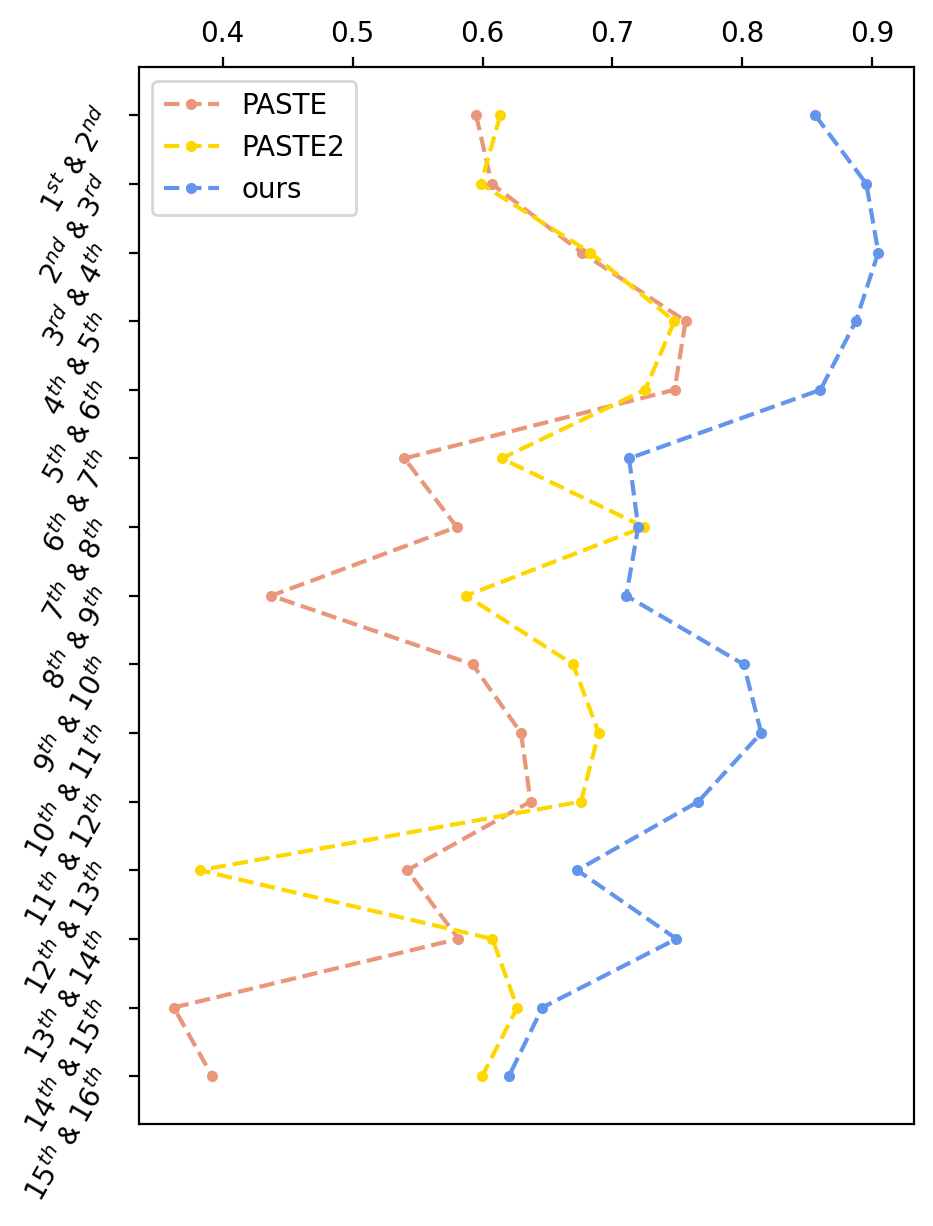

In [24]:
width_ = 0.2
# df_ind_li = [4,6,8,9,10,11,12]
mtd2col = {'ours': 'cornflowerblue', 'ours_ablation': 'tan', 'PASTE': 'darksalmon', 'PASTE2': 'gold'}

def int2order(ind):
    if ind == 1:
        return '$1^{%02s}$' % ('st')
    elif ind == 2:
        return '$2^{%02s}$' % ('nd')
    elif ind == 3:
        return '$3^{%02s}$' % ('rd')
    else:
        return '$%01d^{%02s}$' % (ind, 'th')
    
plt.figure(figsize=(5, 7), dpi=200) # 1.85
df = df_droso_embryo
for i, col in enumerate(df.columns.tolist()):
            plt.plot(df[col], -1 * df.index, 'o--', markersize=3, 
             # height=width_, 
             label=col, 
             color=mtd2col[col])

plt.legend()

# plt.xticks(np.arange(0.2, 0.81, 0.2))
# plt.xlim(0.2, 0.8)
plt.gca().xaxis.tick_top()
plt.yticks(ticks=-1 * df.index, labels=[' & '.join([int2order(ind+1), int2order(ind+2)]) for ind in df.index], fontname='Arial', rotation=60)
# plt.xlabel('score', fontname='Arial')
# plt.ylabel('Pair')

In [ ]:
out_dir  = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/mapping_accuracy'  # change this to your directory to save the csv file, in order to reproduce figure in the paper
df_droso_embryo.to_csv(os.path.join(out_dir, 'drosophila_embryo.csv'))

###### Mapping Accuracy analysis of different methods on Drosophila Larva (L3)

In [4]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'  # change this to your directory that saves output data
mark_data = 'drosophila_larva'
mtd_li = ['ours'] # ['PASTE', 'PASTE2', 'ours']
df_droso_larva = gen_df(all_data_output, mark_data, mtd_li)

ours
[0.4154810490160423, 0.4886653623383752, 0.256690526897952, 0.4986324471717883, 0.6696704032572008, 0.5609259911616168, 0.5383433271733745, 0.6373436215827067, 0.6462101580055416, 0.500913160473674, 0.5301713892956115, 0.4487428426506074, 0.3620536119034221, 0.4244214062653565, 0.2679218649888036]


([<matplotlib.axis.XTick at 0x18dbb99d4f0>,
 [Text(0, 0, '$1^{st}$&$2^{nd}$'),
  Text(1, 0, '$2^{nd}$&$3^{rd}$'),
  Text(2, 0, '$3^{rd}$&$4^{th}$'),
  Text(3, 0, '$4^{th}$&$5^{th}$'),
  Text(4, 0, '$5^{th}$&$6^{th}$'),
  Text(5, 0, '$6^{th}$&$7^{th}$'),
  Text(6, 0, '$7^{th}$&$8^{th}$'),
  Text(7, 0, '$8^{th}$&$9^{th}$'),
  Text(8, 0, '$9^{th}$&$10^{th}$'),
  Text(9, 0, '$10^{th}$&$11^{th}$'),
  Text(10, 0, '$11^{th}$&$12^{th}$'),
  Text(11, 0, '$12^{th}$&$13^{th}$'),
  Text(12, 0, '$13^{th}$&$14^{th}$'),
  Text(13, 0, '$14^{th}$&$15^{th}$'),
  Text(14, 0, '$15^{th}$&$16^{th}$')])

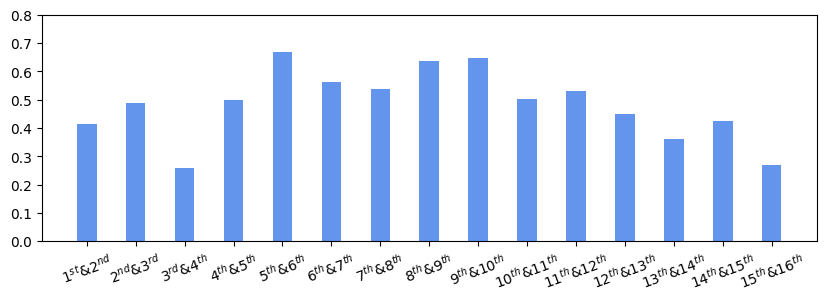

In [53]:
def int2order(ind):
    if ind == 1:
        return '$1^{%02s}$' % ('st')
    elif ind == 2:
        return '$2^{%02s}$' % ('nd')
    elif ind == 3:
        return '$3^{%02s}$' % ('rd')
    else:
        return '$%01d^{%02s}$' % (ind, 'th')

plt.figure(figsize=(10,3), dpi=100)
plt.bar(df_droso_larva['ours'].index, df_droso_larva['ours'], color='cornflowerblue', width=0.4)
plt.ylim(0,0.8)
inds = df_droso_larva['ours'].index
plt.xticks(ticks=inds, labels=['&'.join([int2order(ind+1),int2order(ind+2)]) for ind in inds], rotation=20)

In [ ]:
out_dir  = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/mapping_accuracy'  # change this to your directory to save the csv file, in order to reproduce figure in the paper
df_droso_larva.to_csv(os.path.join(out_dir, 'drosophila_larva.csv'))

###### Mapping Accuracy analysis of different methods on Mouse Embryo (E11.5)

In [ ]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'  # change this to your directory that saves output data
mark_data = 'mouse_embryo_E11.5'
mtd_li = ['PASTE', 'PASTE2', 'ours']
df_mouse_embryo = gen_df(all_data_output, mark_data, mtd_li)

In [ ]:
out_dir  = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/result_analysis/mapping_accuracy'  # change this to your directory to save the csv file, in order to reproduce figure in the paper
df_mouse_embryo.to_csv(os.path.join(out_dir, 'mouse_embryo_E11.5.csv'))

###### Mapping Accuracy analysis of different methods on Mouse Hippocampus

In [ ]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'  # change this to your directory that saves output data
mark_data = 'mouse_hipp'
mtd_li = ['PASTE_0_1_normed', 'PASTE2_0_1_normed', 'ours_0_1_normed']
df_mouse_embryo = gen_df(all_data_output, mark_data, mtd_li)

###### Mapping Accuracy analysis of different methods on Mouse Brain

In [16]:
all_data_output = 'E:/REGISTRATION_SOFTWARE/algorithm/cell_level_regist/paper/output_data/our_pipeline'  # change this to your directory that saves output data
mark_data = 'mouse_brain'
mtd_li = ['PASTE', 'PASTE2', 'ours_sigma0.3']
df_mouse_brain = gen_df(all_data_output, mark_data, mtd_li)

PASTE
[0.44969180490630084, 0.4092222574620301, 0.45722146841549727, 0.3564051290508784, 0.4502019342589756, 0.4950679457656586, 0.5492760535133441, 0.5510136801103721, 0.5133062603823538, 0.46002210063135934, 0.5028893554218224, 0.5926777628209635, 0.6333953621064726, 0.5131287324753276, 0.5657007305501681, 0.616780983916752, 0.524818473488689, 0.5465062202069535, 0.5461103196420357, 0.597426262983908, 0.5296890041389033, 0.5585714487365869, 0.555608044850602, 0.5389849722184767, 0.6447369776270795, 0.6621055165723743, 0.650466274487163, 0.6121940870486672, 0.16197664625145625, 0.43788262455002536, 0.5504374985098831, 0.22218647061990346, 0.516211061665607, 0.5261260847605499, 0.5041557493234834, 0.38861480075901367, 0.41126152890858814, 0.43088051437756714, 0.34438608449273667]
PASTE2
[0.6487513054284711, 0, 0.5539348710990556, 0.47815578775420536, 0.5548003772765687, 0.5532254567644574, 0.6111440610028163, 0, 0.5921135236905589, 0.5768691447577607, 0.6223088614539087, 0.665255459444

([<matplotlib.axis.XTick at 0x21cb6d11c40>,
 [Text(0, 0, '$1^{st}$&$2^{nd}$'),
  Text(1, 0, '$2^{nd}$&$3^{rd}$'),
  Text(2, 0, '$3^{rd}$&$4^{th}$'),
  Text(3, 0, '$4^{th}$&$5^{th}$'),
  Text(4, 0, '$5^{th}$&$6^{th}$'),
  Text(5, 0, '$6^{th}$&$7^{th}$'),
  Text(6, 0, '$7^{th}$&$8^{th}$'),
  Text(7, 0, '$8^{th}$&$9^{th}$'),
  Text(8, 0, '$9^{th}$&$10^{th}$'),
  Text(9, 0, '$10^{th}$&$11^{th}$'),
  Text(10, 0, '$11^{th}$&$12^{th}$'),
  Text(11, 0, '$12^{th}$&$13^{th}$'),
  Text(12, 0, '$13^{th}$&$14^{th}$'),
  Text(13, 0, '$14^{th}$&$15^{th}$'),
  Text(14, 0, '$15^{th}$&$16^{th}$'),
  Text(15, 0, '$16^{th}$&$17^{th}$'),
  Text(16, 0, '$17^{th}$&$18^{th}$'),
  Text(17, 0, '$18^{th}$&$19^{th}$'),
  Text(18, 0, '$19^{th}$&$20^{th}$'),
  Text(19, 0, '$20^{th}$&$21^{th}$'),
  Text(20, 0, '$21^{th}$&$22^{th}$'),
  Text(21, 0, '$22^{th}$&$23^{th}$'),
  Text(22, 0, '$23^{th}$&$24^{th}$'),
  Text(23, 0, '$24^{th}$&$25^{th}$'),
  Text(24, 0, '$25^{th}$&$26^{th}$'),
  Text(25, 0, '$26^{th}$&$27^{th}

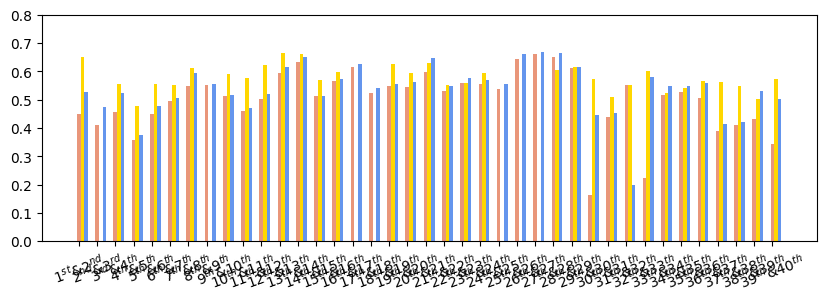

In [18]:
width_ = 0.2
mtd_color = {'ours': 'cornflowerblue', 'ours_ablation': 'tan', 'PASTE': 'darksalmon', 'PASTE2': 'gold'}

def int2order(ind):
    if ind == 1:
        return '$1^{%02s}$' % ('st')
    elif ind == 2:
        return '$2^{%02s}$' % ('nd')
    elif ind == 3:
        return '$3^{%02s}$' % ('rd')
    else:
        return '$%01d^{%02s}$' % (ind, 'th')
    
inds = df_mouse_brain['PASTE'].index
xcor = np.arange(len(inds))

plt.figure(figsize=(10,3), dpi=100)
plt.bar(xcor, df_mouse_brain['PASTE'], color=mtd_color['PASTE'], width=width_)
plt.bar(xcor+width_, df_mouse_brain['PASTE2'], color=mtd_color['PASTE2'], width=width_)
plt.bar(xcor+2*width_, df_mouse_brain['ours_sigma0.3'], color=mtd_color['ours'], width=width_)
plt.ylim(0,0.8)

plt.xticks(ticks=inds, labels=['&'.join([int2order(ind+1),int2order(ind+2)]) for ind in inds], rotation=20)

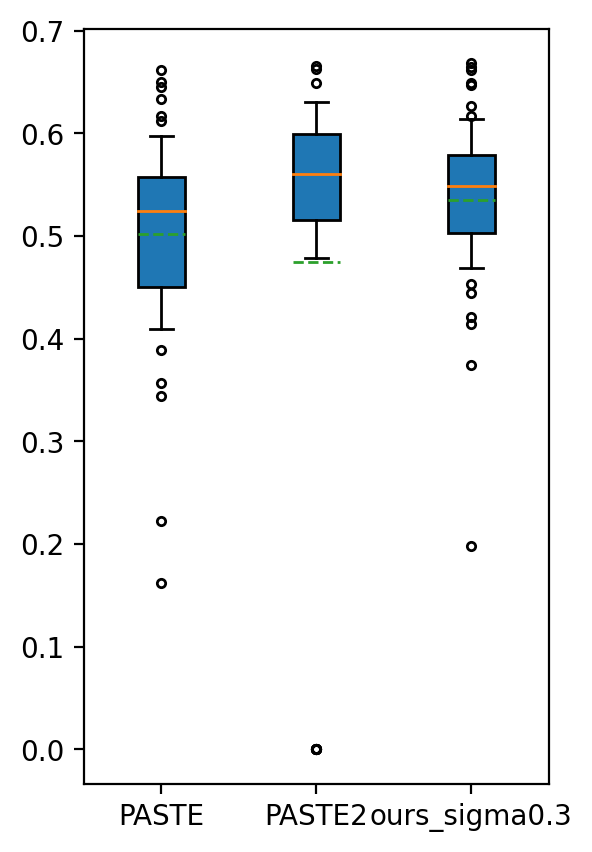

In [24]:
plt.figure(figsize=(3,5), dpi=200)
bp = plt.boxplot(df_mouse_brain, 
            labels=['PASTE', 'PASTE2', 'ours_sigma0.3'],
            showmeans=True,
            meanline=True,
            sym='.',
            whis=0.5,
            patch_artist=True)

In [10]:
len(inds)

39